In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm
import tensorflow as tf
import matplotlib.pyplot as plt

In [134]:
master = pd.read_csv('master1.csv')
master.head()

/var/folders/ky/lc5rgx1n25bfsrtkh1tv2dnw0000gn/T/ipykernel_12875/1865656088.py:1: DtypeWarning: Columns (23,24,36,49,50,52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  master = pd.read_csv('master1.csv')


,ID,Case Number,Date,Time,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,13210072,JG422242,8/11/23,11:00:00 AM,0000X S ALBANY AVE,1790,OFFENSE INVOLVING CHILDREN,CHILD ABDUCTION,RESIDENCE,False,...,5.7,8.0,75.0,2023-08-11T05:54:19,2023-08-11T19:56:35,0.84,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
1,13278080,JG500620,11/11/23,12:00:00 AM,038XX W MADISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,4.6,5.0,10.0,2023-11-11T06:35:05,2023-11-11T16:33:33,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
2,13276884,JG503649,11/10/23,5:30:00 PM,043XX W AUGUSTA BLVD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,...,3.6,5.0,10.0,2023-11-10T06:33:51,2023-11-10T16:34:34,0.91,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
3,12990873,JG161829,8/17/19,1:14:00 PM,008XX N KARLOV AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,...,8.3,3.0,NaN,2019-08-17T06:00:26,2019-08-17T19:48:05,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"72534014819,KORD,KMDW,72530094846,74466504838,..."
4,26262,JE366265,9/8/21,4:45:00 PM,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,...,7.0,6.0,NaN,2021-09-08T06:23:43,2021-09-08T19:11:43,0.06,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"72534014819,C8740,KORD,KMDW,72530094846,F1983,..."


In [ ]:
# Pre eda graphs

In [135]:
master['Primary Type'].unique()

array(['OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'HOMICIDE',
       'NARCOTICS', 'DECEPTIVE PRACTICE', 'KIDNAPPING', 'BATTERY',
       'ASSAULT', 'PUBLIC PEACE VIOLATION', 'ROBBERY', 'CRIMINAL DAMAGE',
       'THEFT', 'BURGLARY', 'WEAPONS VIOLATION', 'SEX OFFENSE',
       'OTHER OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'INTERFERENCE WITH PUBLIC OFFICER',
       'CONCEALED CARRY LICENSE VIOLATION', 'ARSON', 'STALKING',
       'LIQUOR LAW VIOLATION', 'PROSTITUTION', 'INTIMIDATION', 'GAMBLING',
       'CRIM SEXUAL ASSAULT', 'OBSCENITY', 'RITUALISM',
       'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION',
       'HUMAN TRAFFICKING', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [136]:
# Violent crimes, homicide, batterey, assault, robbery, criminal sexual assault
master = master[master['Primary Type'].isin(['HOMICIDE', 'BATTERY', 'ASSAULT', 'ROBBERY', 'CRIMINAL SEXUAL ASSAULT'])]

In [137]:
# feature changing
columns_drop = ['Case Number', 'Time', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic','Beat','District','Ward','Community Area','FBI Code','X Coordinate',
                'Y Coordinate','Updated On','Latitude','Longitude','Location', 'Holiday Day of Week','tempmax','tempmin','feelslikemax','feelslikemin','precipprob','snowdepth','preciptype', 'windgust','winddir',
                'solarradiation','solarenergy','sunrise', 'sunset','moonphase', 'severerisk', 'description', 'icon','stations']
data = master.drop(columns=columns_drop)
data.head()

,ID,Date,FullMoon,Holiday,temp,feelslike,dew,humidity,precip,precipcover,snow,windspeed,sealevelpressure,cloudcover,visibility,uvindex,conditions
4,26262,9/8/21,0,NaN,21.0,21.0,9.6,50.5,0.000,0.00,0.0,30.7,1009.0,32.6,16.0,6.0,Partially cloudy
8,13201805,9/6/23,0,NaN,23.7,23.7,19.3,77.4,3.484,29.17,0.0,28.8,1007.8,88.1,15.4,3.0,"Rain, Partially cloudy"
9,13201684,9/6/23,0,NaN,23.7,23.7,19.3,77.4,3.484,29.17,0.0,28.8,1007.8,88.1,15.4,3.0,"Rain, Partially cloudy"
13,13202316,9/6/23,0,NaN,23.7,23.7,19.3,77.4,3.484,29.17,0.0,28.8,1007.8,88.1,15.4,3.0,"Rain, Partially cloudy"
14,13201430,9/6/23,0,NaN,23.7,23.7,19.3,77.4,3.484,29.17,0.0,28.8,1007.8,88.1,15.4,3.0,"Rain, Partially cloudy"


In [138]:
# Replace NaN values with 0 indicating no holiday and severe risk
data['Holiday'] = data['Holiday'].fillna(0)
#data['severerisk'] = data['severerisk'].fillna(0)

# Replace non-NaN values with 1 indicating a holiday
data.loc[data['Holiday'] != 0, 'Holiday'] = 1

# Optionally, convert the 'Holiday' column to integer type
data['Holiday'] = data['Holiday'].astype(int)

# drop dates before 2010 as weather does not have that data
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
data= data[data['Date'].dt.year >= 2010]

In [41]:
#data.to_csv('test.csv', index=False)

In [139]:
daily_counts = data.groupby('Date').size().reset_index(name='Crime_Count')

# Merge daily_counts with the original DataFrame
merged_data = pd.merge(data, daily_counts, on='Date')

# Drop duplicate rows to keep only one entry per day
final_data = merged_data.drop_duplicates(subset='Date')

# Display the final DataFrame
final_data.head()

,ID,Date,FullMoon,Holiday,temp,feelslike,dew,humidity,precip,precipcover,snow,windspeed,sealevelpressure,cloudcover,visibility,uvindex,conditions,Crime_Count
0,26262,2021-09-08,0,0,21.0,21.0,9.6,50.5,0.000,0.00,0.0,30.7,1009.0,32.6,16.0,6.0,Partially cloudy,10
10,13201805,2023-09-06,0,0,23.7,23.7,19.3,77.4,3.484,29.17,0.0,28.8,1007.8,88.1,15.4,3.0,"Rain, Partially cloudy",16
26,13039389,2023-04-12,0,0,22.1,21.9,5.8,36.3,0.000,0.00,0.0,37.4,1013.8,14.3,16.0,8.0,Clear,12
38,13193026,2023-08-30,0,0,18.5,18.5,11.4,63.6,0.000,0.00,0.0,27.7,1017.2,49.8,16.0,4.0,Partially cloudy,13
51,13273367,2023-11-10,0,0,5.6,2.8,-1.8,59.4,0.000,0.00,0.0,23.1,1023.5,50.8,16.0,5.0,Partially cloudy,17


In [43]:
#final_data.to_csv('test.csv', index=False)

In [140]:
final_data['conditions'] = final_data['conditions'].str.split(',').apply(lambda x: [c.strip() for c in x])

# Get the set of all unique conditions
unique_conditions = set(condition for sublist in final_data['conditions'] for condition in sublist)

# Create dummy variables for each unique condition
for condition in unique_conditions:
    final_data.loc[:, condition] = final_data['conditions'].apply(lambda x: 1 if condition in x else 0)

# Drop the original 'Conditions' column
final_data.drop(columns=['conditions'], inplace=True)

/var/folders/ky/lc5rgx1n25bfsrtkh1tv2dnw0000gn/T/ipykernel_12875/2593382681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['conditions'] = final_data['conditions'].str.split(',').apply(lambda x: [c.strip() for c in x])
/var/folders/ky/lc5rgx1n25bfsrtkh1tv2dnw0000gn/T/ipykernel_12875/2593382681.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:, condition] = final_data['conditions'].apply(lambda x: 1 if condition in x else 0)
/var/folders/ky/lc5rgx1n25bfsrtkh1tv2dnw0000gn/T/

In [141]:
final_data.to_csv('test.csv', index=False)

# EDA Plots

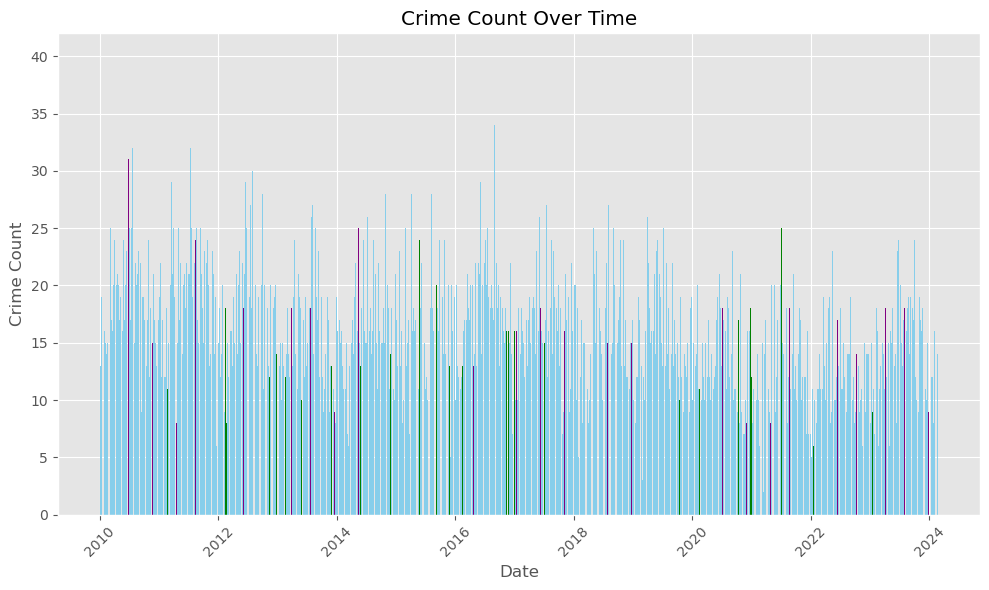

In [153]:
# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Iterate over the DataFrame rows
for index, row in final_data.iterrows():
    # Set color and label based on 'Holiday' and 'Fullmoon' columns
    color = 'skyblue'  # Default color
    if row['Holiday'] == 1:
        color = 'green'
    elif row['FullMoon'] == 1:
        color = 'purple'
    
    # Plot bars
    plt.bar(row['Date'], row['Crime_Count'], color=color)

# Labeling axes and title
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.title('Crime Count Over Time')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Linear Regression

In [46]:
X = final_data.drop(columns=['Crime_Count', 'ID', 'Date'])

# Extract the target variable
y = final_data['Crime_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train.to_csv('test.csv', index=False)

In [48]:
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.coef_

array([-8.21163837e-01,  3.52286405e-01, -2.38118976e-03,  2.04126259e-01,
       -9.80981519e-02,  4.13273468e-02, -4.09417549e-02, -7.33417407e-03,
       -2.50496735e-01, -6.18090982e-03, -1.80317076e-02,  7.28775879e-03,
       -1.81183777e-02,  3.83165256e-01, -1.65563545e+00, -2.17824150e-01,
        1.48111406e+00,  1.96919648e+00,  7.80737727e-02,  2.98714288e+00,
        1.51548994e+00])

In [63]:
X_with_intercept = sm.add_constant(X_train)  # Add intercept term
sm_model = sm.OLS(y_train, X_with_intercept).fit()

# Access p-values
p_values = sm_model.pvalues
p_values

const                             8.607210e-02
FullMoon                          3.343674e-02
Holiday                           3.498159e-01
temp                              9.907373e-01
feelslike                         1.051584e-02
dew                               5.955447e-01
humidity                          3.987525e-01
precip                            9.425423e-03
precipcover                       3.714668e-01
snow                              4.765051e-02
windspeed                         6.079234e-01
sealevelpressure                  1.832222e-01
cloudcover                        1.543704e-01
visibility                        7.444947e-01
uvindex                           5.127568e-22
Freezing Drizzle/Freezing Rain    4.839412e-01
Snow                              4.836295e-01
Partially cloudy                  4.775279e-01
Clear                             3.472864e-01
Rain                              7.250583e-01
Ice                               1.238787e-01
Overcast     

In [51]:
# Predictions on the testing data
y_pred = model.predict(X_test)

In [52]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 22.508801874052303
R^2 Score: 0.23435409896539983


In [64]:
lasso_cv = LassoCV(cv=50)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=50)

In [65]:
preds = lasso_cv.predict(X_test)
mean_squared_error(y_test, preds)

22.45451512915208

In [66]:
lasso_cv.coef_

array([-0.        ,  0.        , -0.        ,  0.12845174, -0.        ,
        0.0179963 , -0.03647139, -0.00631335, -0.12218187, -0.00916187,
       -0.01739322,  0.00447039, -0.00190562,  0.35895157, -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

# Neural network

In [75]:
# Split the data into training and temporary sets (70% training, 30% temporary)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and testing sets (50% validation, 50% testing)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [131]:
# Define the neural network architecture
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(21,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=70, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 276.9162 - mean_squared_error: 276.9148 - val_loss: 764.8884 - val_mean_squared_error: 732.8911
Epoch 2/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 261.7115 - mean_squared_error: 261.7128 - val_loss: 578.9908 - val_mean_squared_error: 551.8719
Epoch 3/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 232.0914 - mean_squared_error: 232.0938 - val_loss: 349.0973 - val_mean_squared_error: 329.1074
Epoch 4/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 194.1580 - mean_squared_error: 194.1627 - val_loss: 221.5202 - val_mean_squared_error: 207.0222
Epoch 5/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152.9360 - mean_squared_error: 152.9304 - val_loss: 162.4516 - val_mean_squared_error: 149.5303
Epoch 6/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 113.3197 - mean_squared_error: 113.3211 - val_loss: 114.4677 - val_mean_squared_error: 102.5066
Epoch 7/70
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.1355 - mean_squ

In [132]:
# Evaluate the model
loss, mse = nn_model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.4555 - mean_squared_error: 26.3662 
Mean Squared Error: 23.403295516967773
